# Problem 1


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import solvers,matrix

class SVM:
    def __init__(self,X_train,Y_train,X_test,Y_test,eta):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.N = X_train.shape[0]
        self.d = X_train.shape[1]
        self.W = np.ones((self.d,))
        self.b = np.zeros((1,))
        self.eta = eta
        self.loss = []
    def QPsolve(how):
        if how == 'linear':
            return self.QPsolve_linear()
    def QPsolve_linear(self):
        Q = np.identity(self.d)
        Q[0,0] = 0
        p = np.zeros((self.d,1))
        G = np.zeros((self.N,self.d))
        for i in range(self.N):
            G[i] -= self.Y_train[i] * self.X_train[i]
        h = -1 * np.ones((self.N,1))
        Q = matrix(Q)
        p = matrix(p)
        G = matrix(G)
        h = matrix(h)
        sol = solvers.qp(Q,p,G,h)
        self.W = np.array(sol['x'])
        print("linear W = {}".format(self.W))
        return sol['x'],sol['primal objective']
    def QPsolve_dual(self):
        Y = self.Y_train
        X = self.X_train
        Q = np.matmul(Y,Y.T) * np.matmul(X,X.T)
        p = -1 * np.ones((self.N,1))        
        G = -1 * np.identity(self.N)
        h = np.zeros((self.N,1))
        A = self.Y_train.T
        b = np.zeros((1,1))
        Q = matrix(Q)
        p = matrix(p)
        G = matrix(G)
        h = matrix(h)
        A = matrix(A)
        b = matrix(b)
        sol = solvers.qp(Q,p,G,h,A.T,b)
        alpha = np.array(sol['x'])
        self.W = np.zeros((self.d,))
        idx = np.where(alpha>1e-7)[0]
        for i in range(self.N):
            self.W += (alpha[i] * Y[i]) *  X[i]
        id = idx[0]
        self.b = Y[id] - self.W.T.dot(X[id])
        print("dual W = {}".format(self.W))
        return sol['x'],sol['primal objective']
        

def gen_data(u10,sigma10,u11,sigma11,u20,sigma20,u21,sigma21,n : int = 200):
    # 协方差矩阵等于单位矩阵 <=> 独立
    x1_0 = np.ones((n,1))
    x1_1 = np.random.normal(u10,sigma10,n).reshape(n,1)
    x1_2 = np.random.normal(u11,sigma11,n).reshape(n,1)
    x1 = np.concatenate((x1_0,x1_1,x1_2),axis=1)
    y1 = np.ones((n,))

    x2_0 = np.ones((n,1))
    x2_1 = np.random.normal(u20,sigma20,n).reshape(n,1)
    x2_2 = np.random.normal(u21,sigma21,n).reshape(n,1)
    x2 = np.concatenate((x2_0, x2_1,x2_2), axis=1)
    y2 = - np.ones(n,)
    train_set_x = np.concatenate((x1[0:int(0.8 * n),],x2[0:int(0.8 * n),]))
    train_set_y = np.concatenate((y1[0:int(0.8 * n),],y2[0:int(0.8 * n),]))
    test_set_x = np.concatenate((x1[int(0.8 * n):,],x2[int(0.8 * n):,]))
    test_set_y = np.concatenate((y1[int(0.8 * n):, ], y2[int(0.8 * n):, ]))
    return (train_set_x,train_set_y,test_set_x,test_set_y)

train_set_x,train_set_y,test_set_x,test_set_y = gen_data(-5,1,0,1,0,1,5,1)
model = SVM(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model.QPsolve_dual()

     pcost       dcost       gap    pres   dres
 0: -1.5625e-03 -4.6869e-03  3e+02  2e+01  1e+00
 1: -3.3708e-05 -6.2456e-03  3e+00  2e-01  1e-02
 2: -1.8760e-04 -5.8699e-03  9e-02  5e-03  3e-04
 3: -1.4399e-03 -1.8215e-03  9e-03  4e-04  3e-05
 4: -1.0892e-03 -9.4172e-04  3e-03  1e-04  8e-06
 5: -8.8862e-04 -8.2160e-04  1e-03  5e-05  3e-06
 6: -7.8331e-04 -8.0491e-04  1e-04  4e-06  2e-07
 7: -7.9784e-04 -8.0003e-04  4e-06  6e-08  3e-09
 8: -7.9960e-04 -7.9968e-04  1e-07  7e-10  4e-11
Optimal solution found.
dual W = [-2.20752546e-19 -3.15104616e-03 -3.86100985e-03]


(<320x1 matrix, tc='d'>, -0.0007996025287594139)

In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

def train_and_plot_data(model,train_set_x,train_set_y,test_set_x,test_set_y):
    N_train = train_set_x.shape[0]
    half_N_train = N_train // 2
    N_test = test_set_x.shape[0]
    half_N_test = N_test // 2    
    plt.scatter(train_set_x[half_N_train:,1], train_set_x[half_N_train:,2],c='red',marker='v',alpha=0.6)
    plt.scatter(train_set_x[0:half_N_train,1], train_set_x[0:half_N_train,2],c='blue',marker='v',alpha=0.6)
    #plt.scatter(test_set_x[half_N_test:,1], test_set_x[half_N_test:,2],c='red',alpha=0.6)
    #plt.scatter(test_set_x[0:half_N_test,1], test_set_x[0:half_N_test,2],c='blue',alpha=0.6)
    model.QPsolve_linear()
    abline(-model.W[1]/model.W[2],-model.W[0]/model.W[1])
    model.QPsolve_dual()
    abline(-model.W[1]/model.W[2],-model.W[0]/model.W[1])
    plt.show()

     pcost       dcost       gap    pres   dres
 0:  3.5192e-02  6.6410e+01  1e+03  2e+00  2e+03
 1:  2.9387e-01 -7.8126e+01  9e+01  2e-01  2e+02
 2:  3.8356e-01 -9.3110e+00  1e+01  2e-02  3e+01
 3:  3.9614e-01  2.7308e-01  1e-01  2e-04  2e-01
 4:  3.8443e-01  3.7057e-01  1e-02  2e-05  2e-02
 5:  3.8403e-01  3.8348e-01  6e-04  7e-07  8e-04
 6:  3.8399e-01  3.8398e-01  8e-06  8e-09  1e-05
 7:  3.8399e-01  3.8399e-01  8e-08  8e-11  1e-07
Optimal solution found.
linear W = [[ 0.27763069]
 [-0.59027234]
 [-0.64772847]]
     pcost       dcost       gap    pres   dres
 0: -1.5625e-03 -4.6870e-03  3e+02  2e+01  1e+00
 1: -3.3374e-05 -6.2464e-03  3e+00  2e-01  1e-02
 2: -1.4833e-04 -5.9511e-03  9e-02  5e-03  3e-04
 3: -1.4296e-03 -2.2056e-03  1e-02  6e-04  3e-05
 4: -6.5647e-04 -6.9531e-04  9e-04  4e-05  2e-06
 5: -5.2511e-04 -5.8578e-04  2e-04  7e-06  4e-07
 6: -5.5516e-04 -5.8104e-04  4e-05  6e-07  3e-08
 7: -5.7698e-04 -5.7788e-04  1e-06  2e-08  1e-09
 8: -5.7773e-04 -5.7784e-04  1e-07  1e-

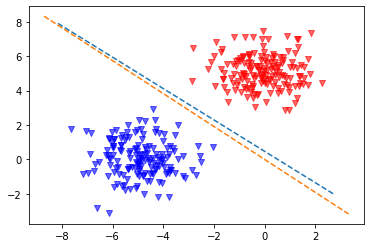

In [ ]:
train_and_plot_data(model,train_set_x,train_set_y,test_set_x,test_set_y)

我们可以看到SVM表现良好，成功找到了margin最大的分类面。

# Problem 2

     pcost       dcost       gap    pres   dres
 0:  4.5703e-03  1.5099e+01  6e+01  2e+00  3e+02
 1:  4.6198e-02 -1.1101e+01  2e+01  5e-01  9e+01
 2:  8.0671e-02 -1.1034e+00  1e+00  2e-02  5e+00
 3:  7.1962e-02  1.2370e-02  6e-02  3e-15  5e-14
 4:  4.2696e-02  3.4933e-02  8e-03  4e-15  9e-14
 5:  4.1747e-02  4.1277e-02  5e-04  4e-15  1e-13
 6:  4.1625e-02  4.1621e-02  5e-06  4e-15  3e-14
 7:  4.1624e-02  4.1624e-02  5e-08  3e-15  1e-13
Optimal solution found.
linear W = [[-33.98333476]
 [  0.28323921]
 [ -0.05499059]]


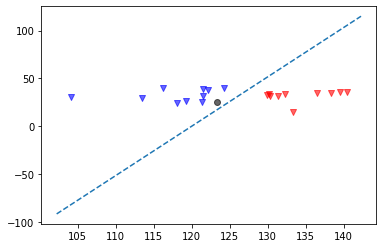

In [38]:
def train_and_plot_data(model,train_set_x,train_set_y,test_set_x,test_set_y):
    N_train = train_set_x.shape[0]
    half_N_train = N_train // 2
    N_test = test_set_x.shape[0]
    half_N_test = N_test // 2    
    plt.scatter(train_set_x[half_N_train:,1], train_set_x[half_N_train:,2],c='red',marker='v',alpha=0.6)
    plt.scatter(train_set_x[0:half_N_train,1], train_set_x[0:half_N_train,2],c='blue',marker='v',alpha=0.6)
    plt.scatter(test_set_x[0,1], test_set_x[0,2],c='black',alpha=0.6)
    model.QPsolve_linear()    
    abline(-model.W[1]/model.W[2],-model.W[0]/model.W[2])
    plt.show()
X1 = np.array([[1,119.28, 26.08],    # 福州
        [1,121.31, 25.03],    # 台北
        [1,121.47, 31.23],    # 上海
        [1,118.06, 24.27],    # 厦门
        [1,113.53, 29.58],    # 武汉
        [1,104.06, 30.67],    # 成都
        [1,116.25, 39.54],    # 北京
        [1,121.46, 39.04],    # 大连
        [1,122.10, 37.50],    # 威海
        [1,124.23, 40.07]])   # 丹东

X2 = np.array([[1,129.87, 32.75],    # 长崎
        [1,130.33, 31.36],    # 鹿儿岛
        [1,131.42, 31.91],    # 宫崎
        [1,130.24, 33.35],    # 福冈
        [1,136.54, 35.10],    # 名古屋
        [1,132.27, 34.24],    # 广岛
        [1,139.46, 35.42],    # 东京
        [1,133.33, 15.43],    # 鸟取
        [1,138.38, 34.98],    # 静冈
        [1,140.47, 36.37]])   # 水户
Y1 = np.full(X1.shape[0], -1)
Y2 = np.ones(X2.shape[0])
X = np.concatenate((X1,X2),axis=0)
Y = np.concatenate((Y1,Y2))
X_test = np.array([[1,123.28, 25.45]])
Y_test = np.array([-1])
model = SVM(X,Y,X_test,Y_test,0.001)
train_and_plot_data(model,X,Y,X_test,Y_test)

我们看到，SVM将钓鱼岛归为中国的一部分。